## Author: Maryam Khanahmadi - Computational physicist - Posdtocs at Chalmers University of thecnology
## Email: m.khanahmadi94@gmail.com

#### This code explores differnet Optimization methods on the functionality of the feed-forward neural netwrok perfoming classification task.
#### The optimization methods include : - Hyper parameter optimization
####                                    - Doroup out methods
####                                    - Applying multimple optimizer to compare the results together.

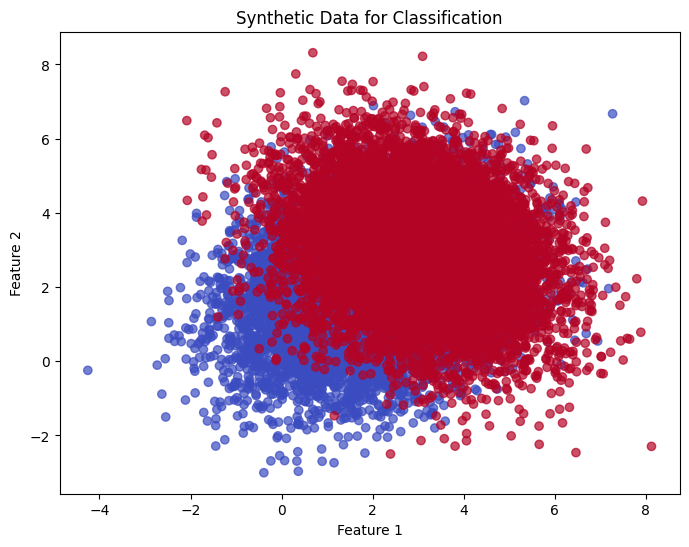

Training set shape: (14000, 2)
Testing set shape: (6000, 2)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)  # For reproducibility
n_samples = 20000  # Number of samples

# Generate random data for two classes
# Adjust means and covariances to make classes overlap more
mean_0 = [2, 2]
cov_0 = [[2, 0.5], [0.5, 2]]  # Diagonal covariance for class 0
mean_1 = [3, 3]
cov_1 = [[2, -0.5], [-0.5, 2]]  # Diagonal covariance for class 1

class_0 = np.random.multivariate_normal(mean_0, cov_0, n_samples // 2)
class_1 = np.random.multivariate_normal(mean_1, cov_1, n_samples // 2)

# Combine the data into one array
data = np.vstack((class_0, class_1))
labels = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df['Label'] = labels
df.to_csv('synthetic_classification_data.csv', index=False)


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Label'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data for Classification')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2']], df['Label'], test_size=0.3, random_state=0)

# Print the shape of the training and testing sets
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')


Epoch 1/50


/Users/maryamkhanahmadi/maryamenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.6726 - loss: 0.6195 - val_accuracy: 0.6882 - val_loss: 0.5792
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7041 - loss: 0.5715 - val_accuracy: 0.6936 - val_loss: 0.5684
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7074 - loss: 0.5624 - val_accuracy: 0.6936 - val_loss: 0.5688
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.7086 - loss: 0.5579 - val_accuracy: 0.6939 - val_loss: 0.5661
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.7107 - loss: 0.5592 - val_accuracy: 0.6914 - val_loss: 0.5655
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.7051 - loss: 0.5647 - val_accuracy: 0.6943 - val_loss: 0.5656
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7087 - loss: 0.5629 - val_accuracy: 0.6929 - val_loss: 0.5663
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7107 - loss: 0.5589 - val_accurac

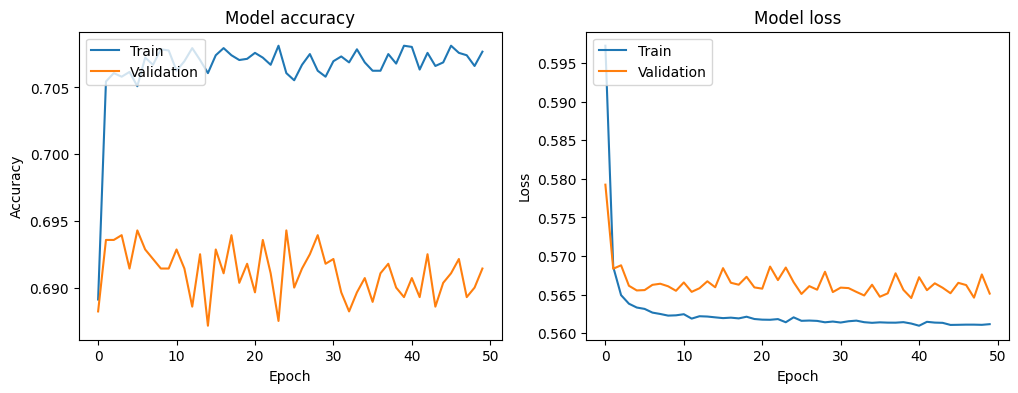

In [2]:
# The intial Model for the Classification
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('synthetic_classification_data.csv')

# Split the data into features and labels
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



Training with Adam optimizer


/Users/maryamkhanahmadi/maryamenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.7048 - loss: 0.5820
Test Accuracy with Adam: 70.48%

Training with SGD optimizer


/Users/maryamkhanahmadi/maryamenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.7084 - loss: 0.5747
Test Accuracy with SGD: 70.73%

Training with RMSprop optimizer


/Users/maryamkhanahmadi/maryamenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.7021 - loss: 0.5682
Test Accuracy with RMSprop: 70.37%


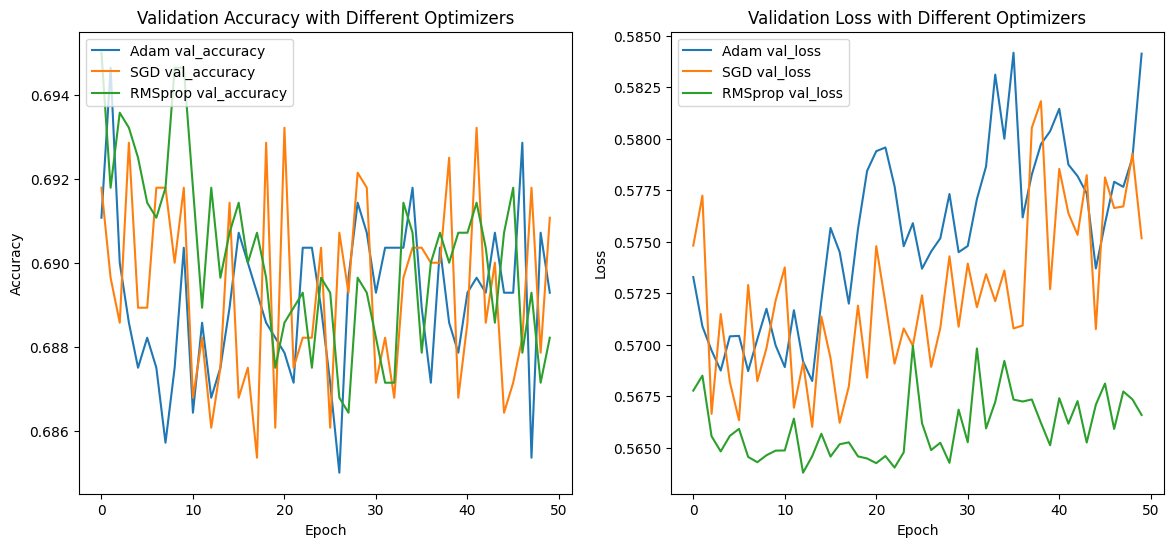

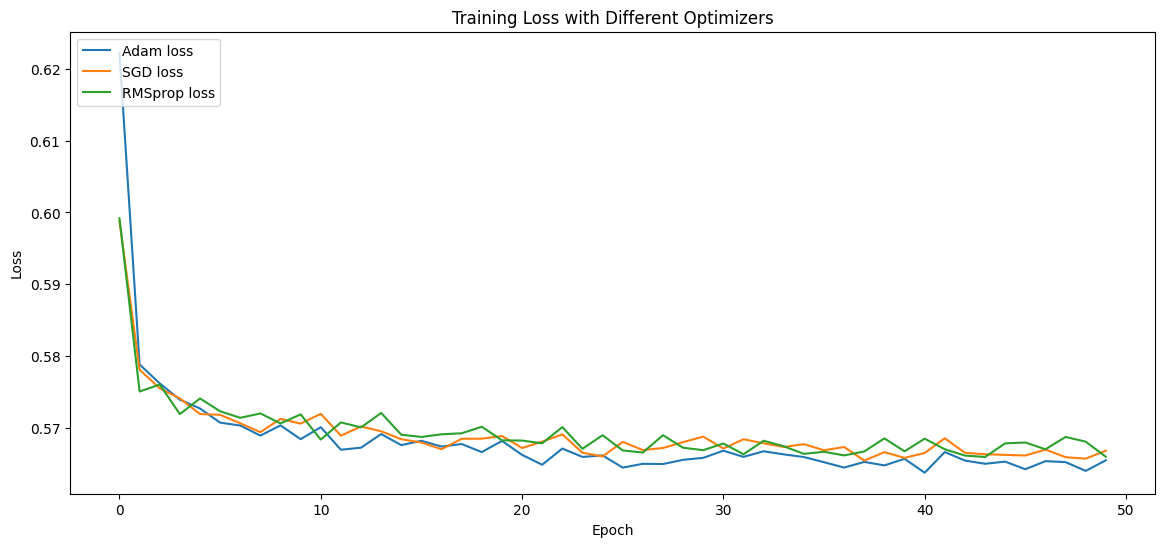

In [3]:
# Introducing different optimizer to compare the result together
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

# Load the dataset
df = pd.read_csv('synthetic_classification_data.csv')

# Split the data into features and labels
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create a model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_dim=2, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create models with different optimizers
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.001)
}

histories = {}
for opt_name, opt in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer")
    model = create_model(optimizer=opt)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    histories[opt_name] = history
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Accuracy with {opt_name}: {accuracy * 100:.2f}%')

# Plot training & validation accuracy values for different optimizers
plt.figure(figsize=(14, 6))

# Plot validation accuracy
plt.subplot(1, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{opt_name} val_accuracy')
plt.title('Validation Accuracy with Different Optimizers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot validation loss
plt.subplot(1, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{opt_name} val_loss')
plt.title('Validation Loss with Different Optimizers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Plot training loss
plt.figure(figsize=(14, 6))
for opt_name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{opt_name} loss')
plt.title('Training Loss with Different Optimizers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


Training with Adam optimizer


/Users/maryamkhanahmadi/maryamenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.7033 - loss: 0.5673
Test Accuracy with Adam: 70.43%

Training with SGD optimizer


/Users/maryamkhanahmadi/maryamenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.7004 - loss: 0.5704
Test Accuracy with SGD: 70.40%

Training with RMSprop optimizer


/Users/maryamkhanahmadi/maryamenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.6989 - loss: 0.5680
Test Accuracy with RMSprop: 70.15%


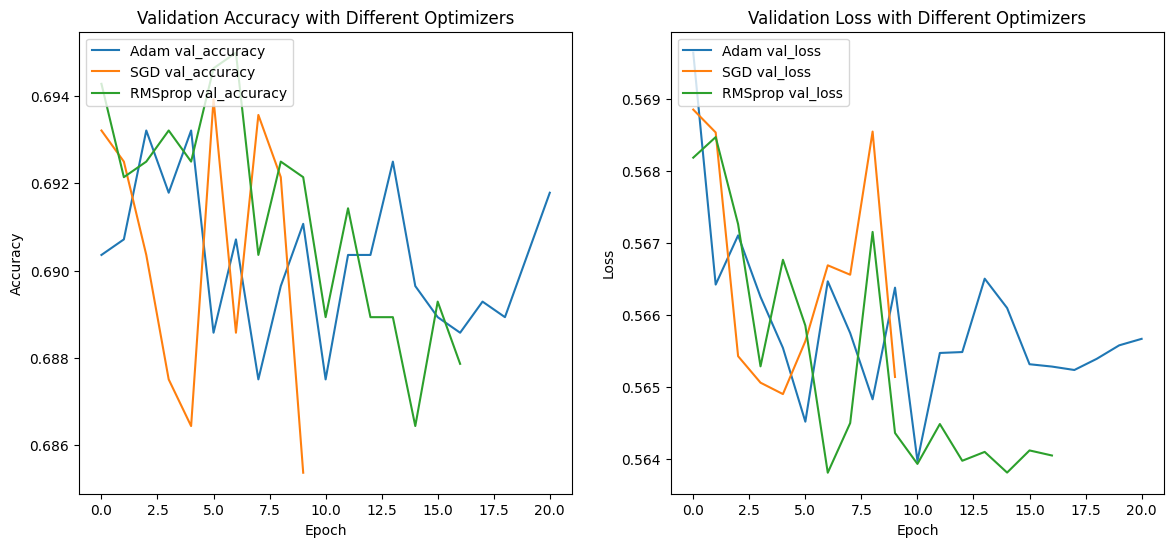

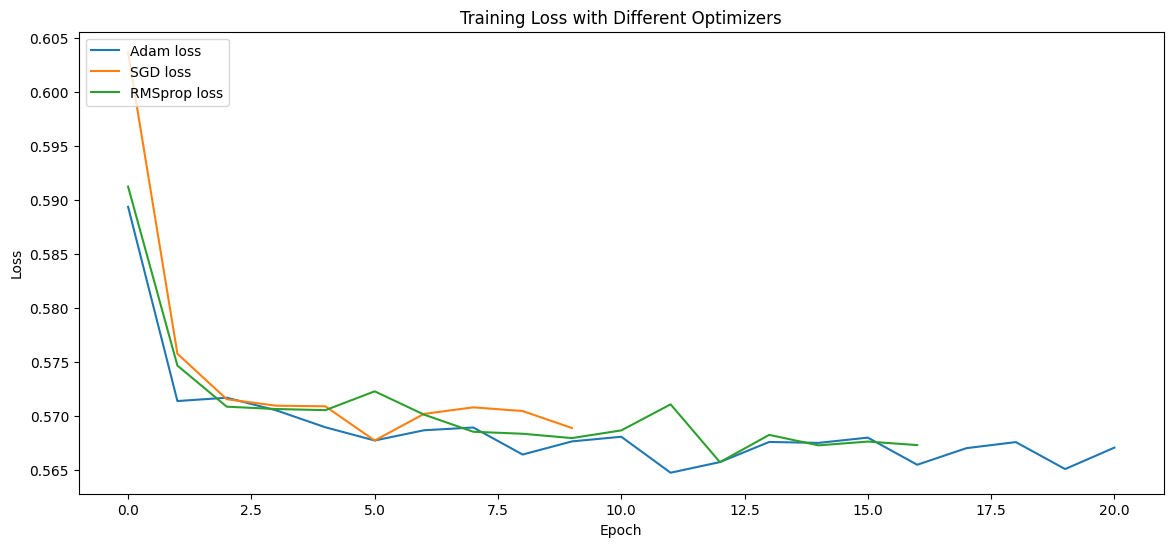

In [4]:
# Early stopping on learning process
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
df = pd.read_csv('synthetic_classification_data.csv')

# Split the data into features and labels
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create a model
def create_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(52, input_dim=2, activation='relu'))
    model.add(Dropout(dropout_rate))  # Dropout layer for regularization
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create models with different optimizers and parameters
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

histories = {}
for opt_name, opt in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer")
    model = create_model(optimizer=opt, dropout_rate=0.5)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0,
                        callbacks=[early_stopping, reduce_lr])
    histories[opt_name] = history
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Accuracy with {opt_name}: {accuracy * 100:.2f}%')

# Plot training & validation accuracy values for different optimizers
plt.figure(figsize=(14, 6))

# Plot validation accuracy
plt.subplot(1, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{opt_name} val_accuracy')
plt.title('Validation Accuracy with Different Optimizers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot validation loss
plt.subplot(1, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{opt_name} val_loss')
plt.title('Validation Loss with Different Optimizers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Plot training loss
plt.figure(figsize=(14, 6))
for opt_name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{opt_name} loss')
plt.title('Training Loss with Different Optimizers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.6949999928474426

Best val_accuracy So Far: 0.6964285969734192
Total elapsed time: 00h 00m 53s


/Users/maryamkhanahmadi/maryamenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7027 - loss: 0.5690
Test Accuracy: 70.40%


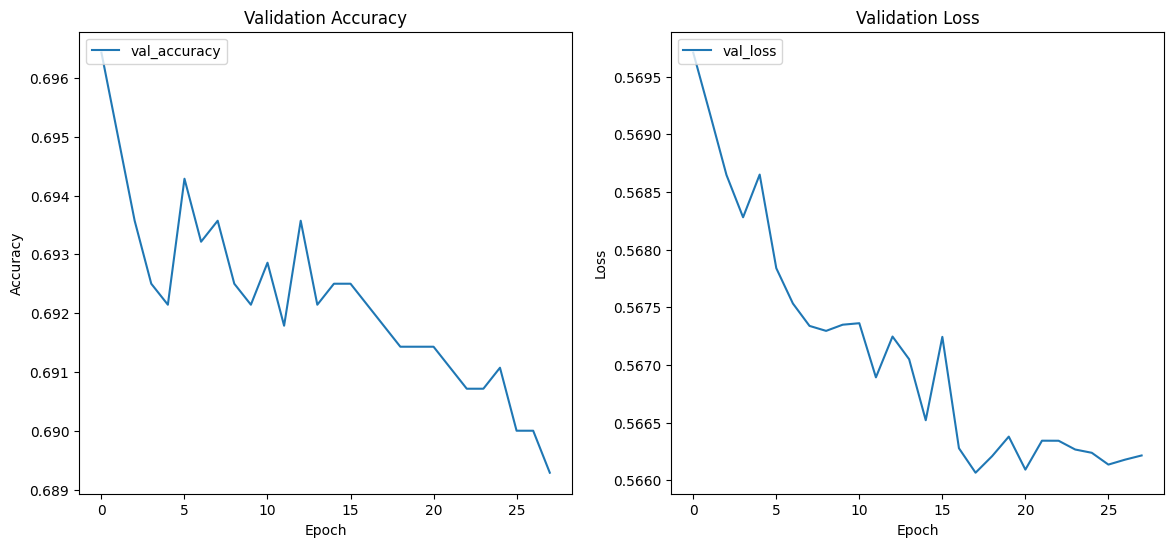

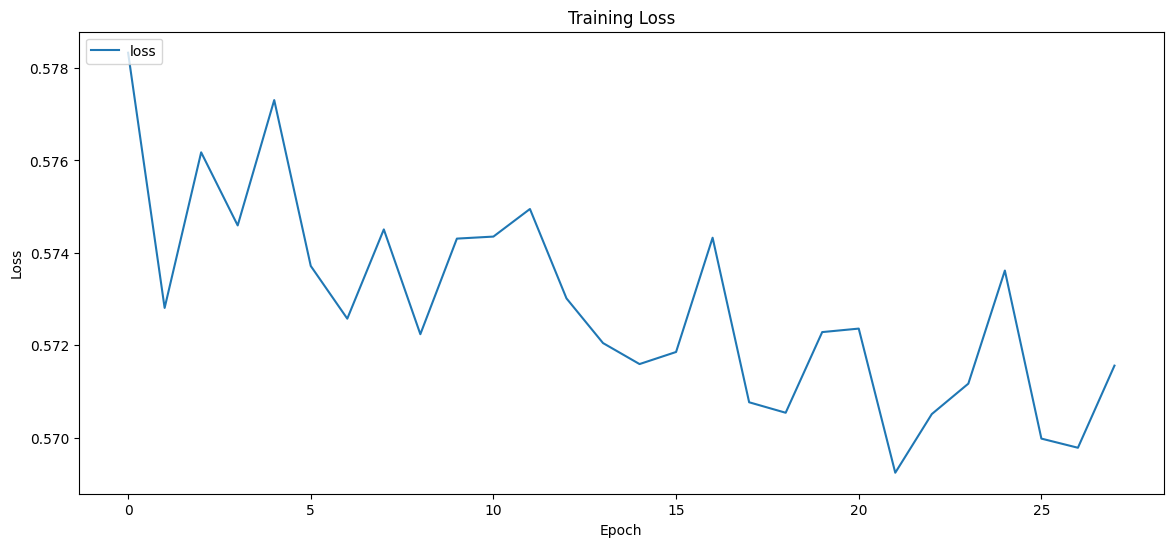

In [5]:
# Applying Hyper parameter optimization to the NN model
import keras_tuner as kt

# Load the dataset
df = pd.read_csv('synthetic_classification_data.csv')

# Split the data into features and labels
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create a model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=16, max_value=64, step=16), activation='relu', input_dim=2))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_3', min_value=8, max_value=32, step=8), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hyperparam_tuning'
)

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the full training data
history = best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping, reduce_lr])

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

# Plot validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Plot training loss
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()
